In [1]:
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
Y = cancer.target

print('Data shape : {}'.format(X.shape))
print('Target shape: {}'.format(Y.shape))

Data shape : (569, 30)
Target shape: (569,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

N, D = X_train.shape

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = nn.Sequential(
    nn.Linear(in_features=D, out_features=1),
    nn.Sigmoid(),
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [6]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32).reshape(-1,1))
Y_test = torch.from_numpy(Y_test.astype(np.float32).reshape(-1,1))

In [7]:
epoch_cout = 1000

train_losses = np.zeros(epoch_cout)
test_losses = np.zeros(epoch_cout)
train_accuracies = np.zeros(epoch_cout)
test_accuracies = np.zeros(epoch_cout)

for it in range(epoch_cout):
    optimizer.zero_grad()
    
    train_predictions = model(X_train)
    
    train_loss = criterion(train_predictions, Y_train)
    train_losses[it] = train_loss.item()
    train_loss.backward()
    
    optimizer.step()
    
    test_predictions = model(X_test)
    
    test_loss = criterion(model(X_test), Y_test)
    test_losses[it] = test_loss.item()
    
    train_accuracy = np.mean(Y_train.numpy() == train_predictions.detach().numpy().round())
    train_accuracies[it] = train_accuracy
    
    test_accuracy = np.mean(Y_test.numpy() == test_predictions.detach().numpy().round())
    test_accuracies[it] = test_accuracy

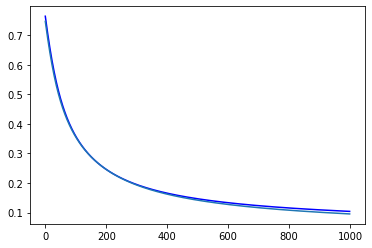

In [8]:
plt.plot(train_losses, 'b')
plt.plot(test_losses)

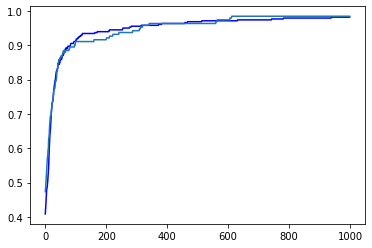

In [9]:
plt.plot(train_accuracies, 'b')
plt.plot(test_accuracies)

In [10]:
with torch.no_grad():
    train_predictions = model(X_train)
    train_predictions = train_predictions.numpy().round()
    train_accuracy = np.mean(Y_train.numpy() == train_predictions)
    print('Train accuracy: {:.4f}'.format(train_accuracy))
    
    test_predictions = model(X_test)
    test_predictions = test_predictions.numpy().round()
    test_accuracy = np.mean(Y_test.numpy() == test_predictions)
    print('Test accuracy: {:.4f}'.format(test_accuracy))
    

Train accuracy: 0.9815
Test accuracy: 0.9842
